In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import plotly.tools as tls
import datetime as dt
import networkx as nx 
import os

In [ ]:
matches=pd.read_csv('ContinousDataset.csv') 

In [ ]:
def hwin(s):
      if (s['Winner'] == s['Team 1']  and s['Venue_Team1'] == "Home"):
              return s['Team 1']
      elif (s['Winner'] == s['Team 2']  and s['Venue_Team2'] == "Home"):
              return s['Team 2']              
      else :
          return np.nan

def awin(s):
      if (s['Winner'] == s['Team 1']  and s['Venue_Team1'] in( "Away",'Neutral')):
              return s['Team 1']
      elif (s['Winner'] == s['Team 2']  and s['Venue_Team2'] in( "Away",'Neutral')):
              return s['Team 2']
              
      else :
          return np.nan

def hloss(s):
      if (s['Winner'] != s['Team 1']  and s['Venue_Team1'] == "Home"):
              return s['Team 1']
      elif (s['Winner'] != s['Team 2']  and s['Venue_Team2'] == "Home"):
              return s['Team 2']
              
      else :
          return np.nan

def aloss(s):
      if (s['Winner'] != s['Team 1']  and s['Venue_Team1'] in( "Away",'Neutral')):
              return s['Team 1']
      elif (s['Winner'] != s['Team 2']  and s['Venue_Team2'] in( "Away",'Neutral')):
              return s['Team 2']          
      else :
          return np.nan

def FirstInningsWinner(s):
      if (s['Winner'] == s['Team 1']  and s['Innings_Team1'] in( "First")):
              return s['Team 1']
      elif (s['Winner'] == s['Team 2']  and s['Innings_Team2'] in( "First")):
              return s['Team 2']          
      else :
          return np.nan

In [ ]:
matches['Year']=matches['Match Date'].str[-4:]
matches_played_byteams=pd.concat([matches['Team 1'],matches['Team 2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches['HomeWin']= matches.apply(hwin,axis=1)
matches['AwayWin']= matches.apply(awin,axis=1)
matches['HomeLoss']= matches.apply(hloss,axis=1)
matches['AwayLoss']= matches.apply(aloss,axis=1)
matches['FistInningsWinner']= matches.apply(FirstInningsWinner,axis=1)
matches_played_byteams.set_index('Team',inplace=True)

In [ ]:
Winner=matches['Winner'].value_counts().sort_values( ascending= False ).reset_index()
Winner.set_index('index',inplace=True)
HomeWin=matches['HomeWin'].value_counts().sort_values( ascending= False ).reset_index()
HomeWin.set_index('index',inplace=True)
AwayWin=matches['AwayWin'].value_counts().sort_values( ascending= False ).reset_index()
AwayWin.set_index('index',inplace=True)
HomeLoss=matches['HomeLoss'].value_counts().sort_values( ascending= False ).reset_index()
HomeLoss.set_index('index',inplace=True)
AwayLoss=matches['AwayLoss'].value_counts().sort_values( ascending= False ).reset_index()
AwayLoss.set_index('index',inplace=True)

FistInningsWinner=matches['FistInningsWinner'].value_counts().sort_values( ascending= False ).reset_index()
FistInningsWinner.set_index('index',inplace=True)

In [ ]:
matches_played_byteams['Total Matches'] =matches_played_byteams['Total Matches']/2
matches_played_byteams['wins']=Winner['Winner']/2
matches_played_byteams['HomeWin']=HomeWin['HomeWin']/2
matches_played_byteams['AwayWin']=AwayWin['AwayWin']/2
matches_played_byteams['HomeLoss']=HomeLoss['HomeLoss']/2
matches_played_byteams['AwayLoss']=AwayLoss['AwayLoss']/2
matches_played_byteams['FistInningsWinner']=FistInningsWinner['FistInningsWinner']/2
matches_played_byteams['SecondInningsWinner']=matches_played_byteams['wins']-matches_played_byteams['FistInningsWinner']
matches_played_byteams['HomeTotal']=matches_played_byteams['HomeWin']+ matches_played_byteams['HomeLoss']
matches_played_byteams['AwayTotal']=matches_played_byteams['AwayWin']+ matches_played_byteams['AwayLoss']

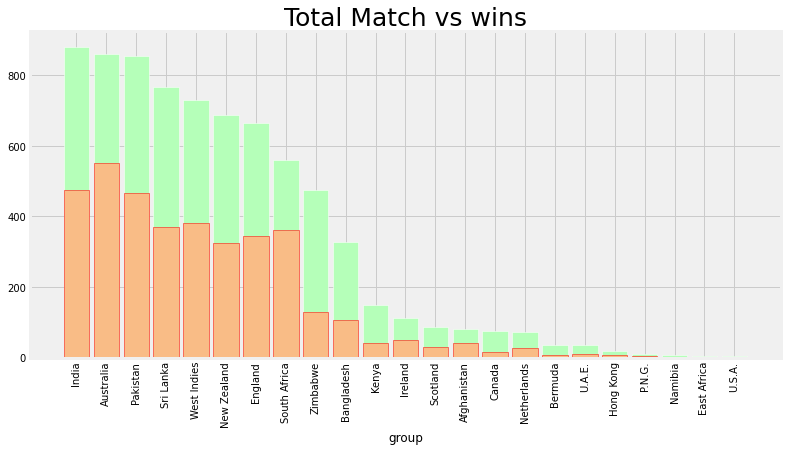

In [ ]:
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(matches_played_byteams.index, matches_played_byteams['Total Matches'], color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(matches_played_byteams.index, matches_played_byteams['wins'], color='#f9bc86', edgecolor='red', width=barWidth)
plt.xticks(matches_played_byteams.index, matches_played_byteams.index,rotation='vertical')
plt.xlabel("group")
plt.title('Total Match vs wins',size=25)
plt.show() 

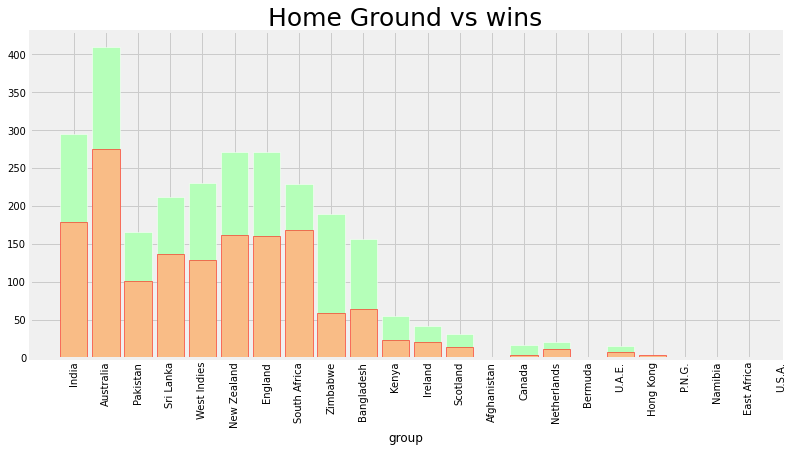

In [ ]:
barWidth = 0.85
plt.subplots(figsize=(12,6))
plt.bar(matches_played_byteams.index, matches_played_byteams['HomeTotal'], color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(matches_played_byteams.index, matches_played_byteams['HomeWin'], color='#f9bc86', edgecolor='red', width=barWidth)
plt.xticks(matches_played_byteams.index, matches_played_byteams.index,rotation='vertical')
plt.xlabel("group")
plt.title('Home Ground vs wins',size=25)
plt.show()     

In [ ]:
team_result=teams.drop(['date','Margin','Ground'],axis=1)
team_result.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [ ]:
final_result= pd.get_dummies(team_result, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
final_result.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,Team_1_Pakistan,Team_1_Scotland,Team_1_South Africa,Team_1_Sri Lanka,Team_1_U.A.E.,Team_1_West Indies,Team_1_Zimbabwe,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_Canada,Team_2_England,Team_2_Hong Kong,Team_2_India,Team_2_Ireland,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,Sri Lanka,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Sri Lanka,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,India,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,India,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X=final_result.drop(['Winner'],axis=1)
y=final_result['Winner']
print(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

     Team_1_Afghanistan  Team_1_Australia  ...  Team_2_West Indies  Team_2_Zimbabwe
0                     0                 0  ...                   0                0
1                     0                 0  ...                   0                0
2                     0                 0  ...                   0                0
3                     0                 0  ...                   0                0
4                     0                 0  ...                   0                0
..                  ...               ...  ...                 ...              ...
933                   0                 0  ...                   0                0
940                   0                 0  ...                   0                0
986                   0                 0  ...                   0                0
988                   0                 0  ...                   0                0
992                   0                 0  ...                   0          

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Traning accuracy: ",train_score)
print("Testing accuracy: ",test_score)

Traning accuracy:  0.7216
Testing accuracy:  0.587360594795539


In [ ]:
y_pred=model.predict(X_test)
y_pred

array(['England', 'South Africa', 'Pakistan', 'Sri Lanka', 'West Indies',
       'Sri Lanka', 'New Zealand', 'India', 'Pakistan', 'India',
       'Australia', 'India', 'New Zealand', 'Sri Lanka', 'England',
       'South Africa', 'New Zealand', 'Afghanistan', 'New Zealand',
       'New Zealand', 'Australia', 'India', 'Pakistan', 'England',
       'South Africa', 'West Indies', 'New Zealand', 'England',
       'Afghanistan', 'India', 'New Zealand', 'England', 'India',
       'Sri Lanka', 'New Zealand', 'England', 'India', 'India',
       'Afghanistan', 'India', 'England', 'New Zealand', 'England',
       'India', 'Pakistan', 'Pakistan', 'India', 'India', 'England',
       'Sri Lanka', 'Australia', 'South Africa', 'Bangladesh', 'India',
       'West Indies', 'Australia', 'Sri Lanka', 'New Zealand', 'India',
       'South Africa', 'Afghanistan', 'Australia', 'England', 'England',
       'India', 'Australia', 'India', 'Sri Lanka', 'England', 'Australia',
       'England', 'England', 'India

ValueError: ignored

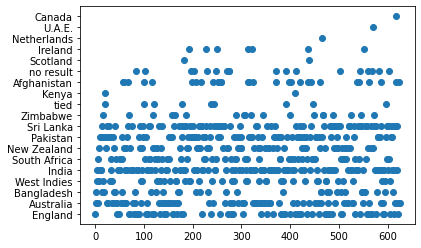

In [ ]:
x_train=np.arange(0,len(X_train),1)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,color='red')
plt.show()